# Real Estate Clean up

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [ ]:
import pandas as pd

# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [ ]:
import pandas as pd 

#showing the dataset
ds = pd.read_csv('assets/real_estate.csv', sep=';')
#loc is used for label-base indexing.. idxmax is used to find the index (row label) of the maximum value in a Series. 
ds2 = ds.loc[ds['price'].idxmax()]
#just did this to change the number into a string.. but if we use f string we don't actually need to do this
price_num = str(ds2['price'])
print ('The house with address ' + ds2['address'] + ' is the most expensive and its price is ' + price_num)


The house with address El Escorial is the most expensive and its price is 8500000


#### Exercise 02. Which is cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [ ]:
import pandas as pd 

ds = pd.read_csv('assets/real_estate.csv', sep=';')

ds2 = ds.loc[ds['price'].idxmin()]
price_num = str(ds2['price'])
print ('The house with address ' + ds2['address'] + ' is the cheapest and its price is ' + price_num)


The house with address Parla is the cheapest and its price is 0


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The bigger house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smaller house is located on County Road 1 N and its surface is 200 meters`

In [ ]:
import pandas as pd 



ds = pd.read_csv('assets/real_estate.csv', sep=';')

#plain english.. locate the row that the surface is the smallest. 
max_surface_ds = ds.loc[ds['surface'].idxmax()]
min_surface_ds = ds.loc[ds['surface'].idxmin()]



print(f"The bigger house is located on { max_surface_ds['address']} and its surface is {max_surface_ds['surface']} meters")
print(f"The smaller house is located on { min_surface_ds['address']} and its surface is {min_surface_ds['surface']} meters")


The bigger house is located on Sevilla la Nueva and its surface is 249000.0 meters
The smaller house is located on Calle Amparo,  Madrid Capital and its surface is 15.0 meters


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the name of the populations with comma as separator. For example:

`> print(populations)`

`population1, population2, population3,...`

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

ds = pd.read_csv('assets/real_estate.csv', sep=';') 

print(ds['level5'].unique())


['Arganda del Rey' 'Fuenlabrada' 'Boadilla del Monte'
 'Las Rozas de Madrid' ' Madrid Capital' 'Villaviciosa de Odón' 'Pinto'
 'Valdemoro' 'Navalcarnero' 'Pozuelo de Alarcón' 'Torrejón de Ardoz'
 'Navalagamella' 'San Sebastián de los Reyes' 'Rivas-vaciamadrid'
 'Alpedrete' 'Móstoles' 'San Fernando de Henares' 'Coslada'
 'Becerril de la Sierra' 'Alcalá de Henares' 'Chinchón' 'Parla' 'Alcorcón'
 'El Escorial' 'Leganés' 'Pedrezuela' 'Majadahonda'
 'Villanueva de la Cañada' 'Villanueva del Pardillo' 'Torrelodones'
 'Moralzarzal' 'Mejorada del Campo' 'Aranjuez' 'Corpa' 'Getafe'
 'Velilla de San Antonio' 'Sevilla la Nueva' 'San Martín de la Vega'
 'Villalbilla' 'Collado Villalba' 'Alcobendas' 'El Molar (Madrid)'
 'Moraleja de Enmedio' 'Algete' 'Campo Real' 'Torrejón de la Calzada'
 'Colmenar Viejo' 'Valdemorillo' 'Fuente El Saz de Jarama' 'Tres Cantos'
 'Arroyomolinos (Madrid)' 'Griñón' 'Paracuellos de Jarama' 'Guadarrama'
 'Titulcia' 'Galapagar' 'Collado Mediano' 'Los Molinos'
 'San Lorenzo

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`true` or `fase`) followed by the rows/cols that contains NAs.

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

ds = pd.read_csv('assets/real_estate.csv', sep=';')

na_count = ds.isna().sum()

hasna = ds.isna().any().any()

print(hasna)

# Check for missing values (NAs) in the entire DataFrame
has_nas = ds.isna().any().any()

# Print the boolean value indicating if there are any NAs
print("Dataset contains NAs:", has_nas)

if has_nas:
    # Print rows (axis 0) with missing values
    rows_with_nas = ds[ds.isna().any(axis=1)]
    print("\nRows with NAs:")
    print(rows_with_nas)

    # Print columns (axis 1) with missing values
    cols_with_nas = ds.columns[ds.isna().any()].tolist()
    print("\nColumns with NAs:", cols_with_nas)


True
Dataset contains NAs: True

Rows with NAs:
       Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
0               1       153771986  False            ferrari 57 inmobiliaria   
1               2       153867863  False  tecnocasa fuenlabrada ferrocarril   
2               3       153430440  False                 look find boadilla   
3               4       152776331  False  tecnocasa fuenlabrada ferrocarril   
4               5       153180188  False            ferrari 57 inmobiliaria   
...           ...             ...    ...                                ...   
15330       15331       153901377  False                infocasa consulting   
15331       15332       150394373  False                inmobiliaria pulpon   
15332       15333       153901397  False             tecnocasa torrelodones   
15333       15334       152607440  False                inmobiliaria pulpon   
15334       15335       153901356  False                infocasa consulting   

   

#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

ds = pd.read_csv('assets/real_estate.csv', sep=';')

ds.dropna() 

print(ds)


       Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
0               1       153771986  False            ferrari 57 inmobiliaria   
1               2       153867863  False  tecnocasa fuenlabrada ferrocarril   
2               3       153430440  False                 look find boadilla   
3               4       152776331  False  tecnocasa fuenlabrada ferrocarril   
4               5       153180188  False            ferrari 57 inmobiliaria   
...           ...             ...    ...                                ...   
15330       15331       153901377  False                infocasa consulting   
15331       15332       150394373  False                inmobiliaria pulpon   
15332       15333       153901397  False             tecnocasa torrelodones   
15333       15334       152607440  False                inmobiliaria pulpon   
15334       15335       153901356  False                infocasa consulting   

       phone_realEstate                            

#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

ds = pd.read_csv('assets/real_estate.csv', sep=';')

population = 'Arroyomolinos (Madrid)'

Am = ds.loc[ds['level5'] == population, 'price'].mean()



print(f"The mean price in Arroyomolinos (Madrid) is: {Am}")

The mean price in Arroyomolinos (Madrid) is: 294541.59854014596


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

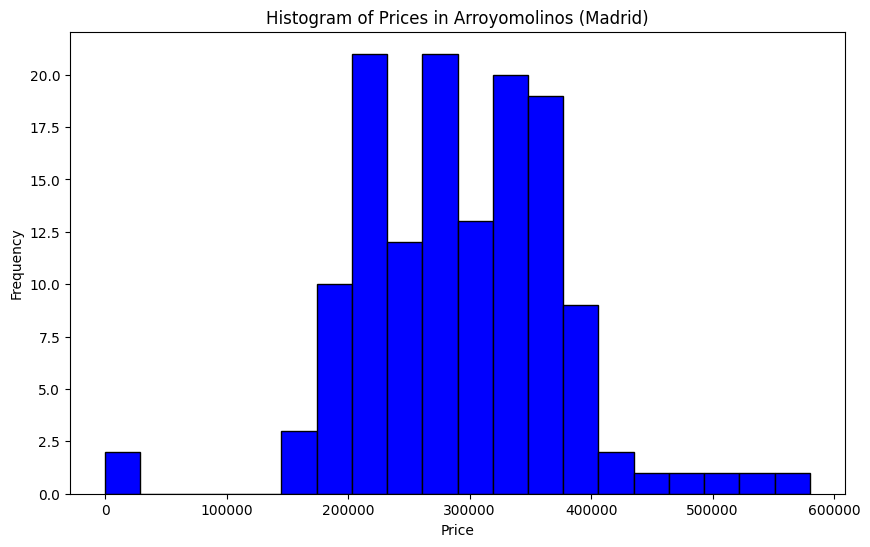

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

ds = pd.read_csv('assets/real_estate.csv', sep=';')


#meanprice. 

am = ds[ds['level5'] == 'Arroyomolinos (Madrid)']


plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create the histogram
plt.hist(am['price'], bins=20, color='blue', edgecolor='black')

# Add labels and a title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title(f'Histogram of Prices in Arroyomolinos (Madrid)')

# Show the plot
plt.show()




**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 09. Is the average of "Valdemorillo" and "Galapagar" prices the same? (★★☆)

Print the both average prices and then write a conclusion about them

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

ds = pd.read_csv('assets/real_estate.csv', sep=';')

Va = ds[ds['level5'] == 'Valdemorillo']['price'].mean()

Ga = ds[ds['level5'] == 'Galapagar']['price'].mean()

result = Va > Ga

print(f'Valdemorillo has a greater average price than Galapagar: {result}')



Valdemorillo has a greater average price than Galapagar: True


#### Exercise 10. Is the average of "Valdemorillo" and "Galapagar" price per square meter (price/m2) the same? (★★☆)

Print the both average prices and then write a conclusion about

Hint: Create a new column called `pps` (price per square) and then analyse the values

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

ds = pd.read_csv('assets/real_estate.csv', sep=';')

Va = ds[ds['level5'] == 'Valdemorillo']

Ga = ds[ds['level5'] == 'Galapagar']



Avg_Va = (Va['price'] / Va['surface']).mean()



Avg_Ga = (Ga['price'] / Ga['surface']).mean()

result = Avg_Va > Avg_Ga

print(f'Valdemorillo has a greater price per square meter average  than Galapagar: {result}')

Valdemorillo has a greater price per square meter average  than Galapagar: False


#### Exercise 11. Analyse the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot` and then write a conclusion about it

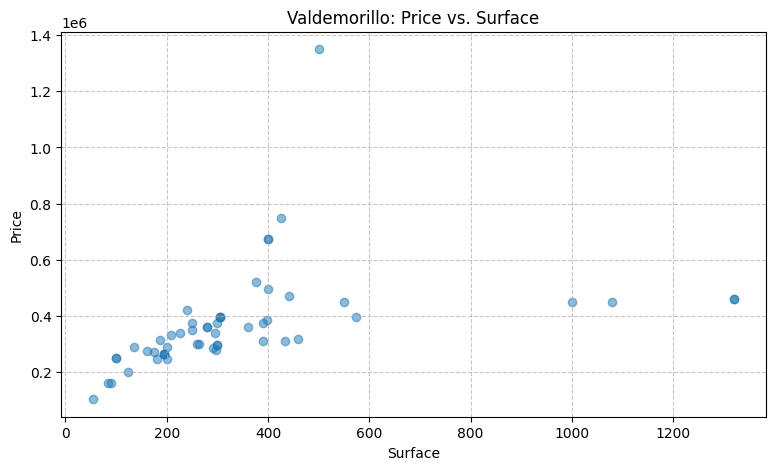

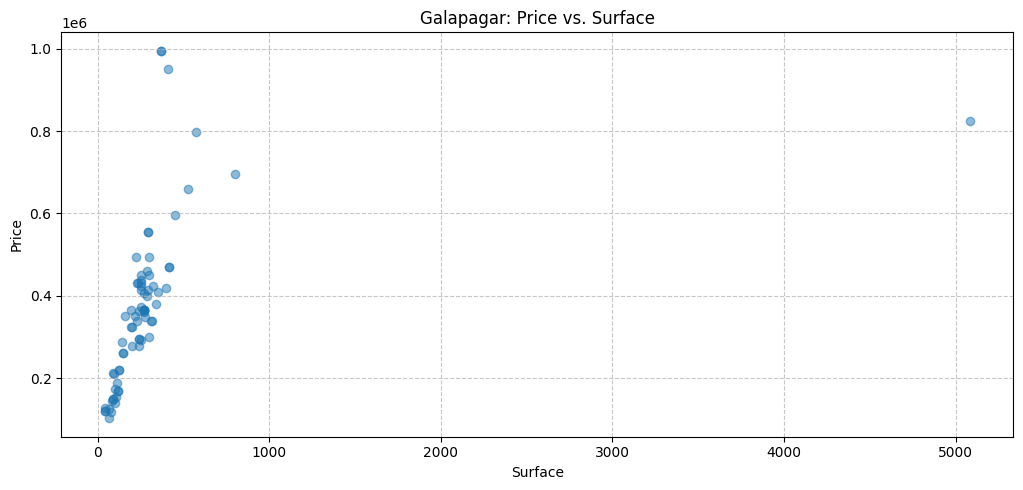

With both houses, the price doesn't necessarily increases with the surface as much as one would think. Galapagar almost shows the opposite, but Valdemorillo shows bit more of a connection. 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

VA = ds[ds['level5'] == "Valdemorillo"]
GA = ds[ds['level5'] == "Galapagar"]

VA_sm = VA['surface']
VA_p = VA['price']

GA_sm= GA['surface']
GA_p = GA['price']

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.scatter(VA_sm, VA_p, alpha=0.5)
plt.title("Valdemorillo: Price vs. Surface")
plt.xlabel("Surface")
plt.ylabel("Price")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.scatter(GA_sm, GA_p, alpha=0.5)
plt.title("Galapagar: Price vs. Surface")
plt.xlabel("Surface")
plt.ylabel("Price")
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("With both houses, the price doesn't necessarily increases with the surface as much as one would think. Galapagar almost shows the opposite, but Valdemorillo shows bit more of a connection. ")


**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 12. How many real estate agencies the dataset contains? (★★☆)

Print the obtained value

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
ds = pd.read_csv('assets/real_estate.csv', sep=';')

print(f"The dataset contains {ds['realEstate_name'].value_counts()} real estate agencies")


The dataset contains realEstate_name
engel volkers madrid    470
infocasa consulting     300
outletdeviviendas       260
housell                 250
solvia inmobiliaria     207
                       ... 
javier garcia             1
ir inmobiliaria           1
jesus                     1
julio                     1
nieves                    1
Name: count, Length: 1821, dtype: int64 real estate agencies


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

ds = pd.read_csv('assets/real_estate.csv', sep=';')


city_counts = ds.groupby('level5').size().reset_index(name='Entry Count')

# Find the city with the most entries
most_entries_city = city_counts.loc[city_counts['Entry Count'].idxmax()]


print(most_entries_city)

level5          Madrid Capital
Entry Count               6643
Name: 0, dtype: object


#### Exercise 14. Now let's work with the "south belt" of madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`

In [ ]:

south_belt_populations = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

south_belt = ds[ds["level5"].isin(south_belt_populations)]

print(south_belt)


       Unnamed: 0  id_realEstates  isNew  \
1               2       153867863  False   
3               4       152776331  False   
85             86       153152077  False   
94             95       153995577  False   
109           110       153586414  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
1              tecnocasa fuenlabrada ferrocarril       916358736.0   
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
85                       sinergical inmobiliaria               NaN   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
...                                          ...   

#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in the question 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot

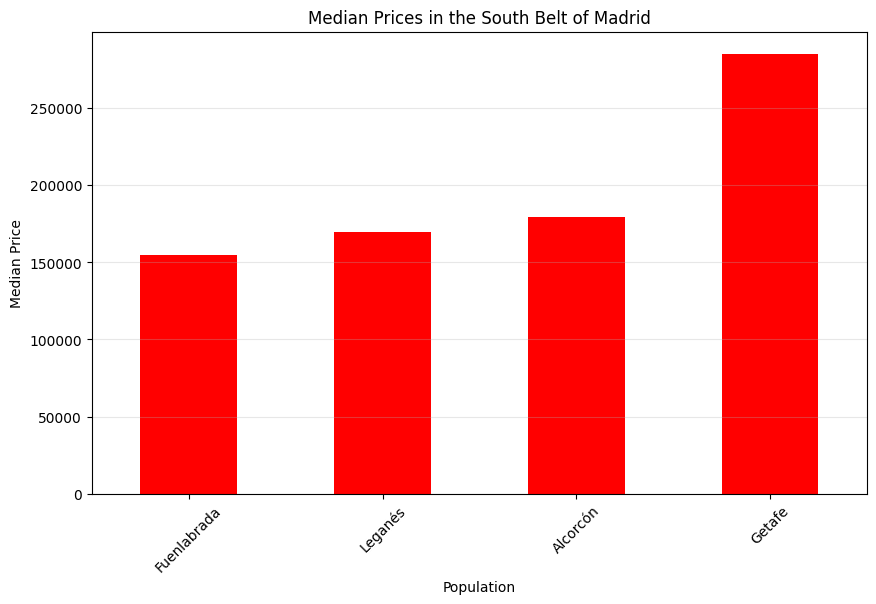

In [ ]:
median_prices = south_belt.groupby('level5')['price'].median().sort_values()

# Create a bar plot
plt.figure(figsize=(10, 6))
median_prices.plot(kind='bar', color='red')
plt.title("Median Prices in the South Belt of Madrid")
plt.xlabel("Population")
plt.ylabel("Median Price")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()


**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in the question 14) (★★★)

Print both values for each variable

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

ds = pd.read_csv('assets/real_estate.csv', sep=';')
# Filter the dataset for the specific cities (Madrid, Barcelona, Valencia, Gijon)
level5 = ['Fuenlabrada','Leganés','Getafe','Alcorcón']
filtered_ds = ds[ds['level5'].isin(level5)]

# Calculate the sample mean and variance for 'price', 'rooms', 'surface area', and 'bathrooms'
mean_price = filtered_ds['price'].mean()
variance_price = filtered_ds['price'].var()

mean_rooms = filtered_ds['rooms'].mean()
variance_rooms = filtered_ds['rooms'].var()

mean_surface = filtered_ds['surface'].mean()
variance_surface = filtered_ds['surface'].var()

mean_bathrooms = filtered_ds['bathrooms'].mean()
variance_bathrooms = filtered_ds['bathrooms'].var()

# Display the results
print("Sample Mean and Variance:")
print(f"Price: Mean = {mean_price}, Variance = {variance_price}")
print(f"Rooms: Mean = {mean_rooms}, Variance = {variance_rooms}")
print(f"Surface Area: Mean = {mean_surface}, Variance = {variance_surface}")
print(f"Bathrooms: Mean = {mean_bathrooms}, Variance = {variance_bathrooms}")



Sample Mean and Variance:
Price: Mean = 223094.48070562293, Variance = 14921367508.04902
Rooms: Mean = 3.0177383592017737, Variance = 0.7188858892927542
Surface Area: Mean = 111.75222363405337, Variance = 4263.051760316337
Bathrooms: Mean = 1.633221850613155, Variance = 0.5717968625577321


#### Exercise 17. What is the most expensive house of each population? You must use the subset obtained in the question 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ds = pd.read_csv('assets/real_estate.csv', sep=';')


# Filter the dataset for the specific cities
level5 = ['Fuenlabrada','Leganés','Getafe','Alcorcón']
filtered_ds = ds[ds['level5'].isin(level5)]

# Group the filtered data by city and find the most expensive house in each city
most_expensive_houses = filtered_ds.groupby('level5')['price'].max().reset_index()

# Display the most expensive houses in each city
print(most_expensive_houses)


        level5    price
0     Alcorcón   950000
1  Fuenlabrada   490000
2       Getafe  1050000
3      Leganés   650000


#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in the question 14) (★★★)

For the normalization method you can use the one you consider to, there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot

Hint: You can help yourself reviewing the multihist demo of Matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


ds = pd.read_csv('assets/real_estate.csv', sep=';')

# Filter the dataset for the specific cities (Madrid, Barcelona, Valencia, Gijon)
level5 = ['Fuenlabrada','Leganés','Getafe','Alcorcón']
filtered_ds = ds[ds['level5'].isin(level5)]

# Normalize prices for each population
normalized_prices = {}
for pop in level5:
    city_data = filtered_ds[filtered_ds['level5'] == pop]
    max_price = city_data['price'].max()
    normalized_prices[pop] = city_data['price'] / max_price

plt.figure(figsize=(10, 6))
for pop, prices in normalized_prices.items():
    sns.histplot(prices, bins=30, label=pop, kde=True)

plt.title('Normalized Prices Histogram for Each Population')
plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'seaborn'

**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in the question 14 (★★☆)

Hint: Create a new column called `pps` (price per square) and then analyse the values

In [ ]:
# import pandas as pd
# ds = pd.read_csv('assets/real_estate.csv', sep=';')


south_belt['pps'] = south_belt['price'] / south_belt['surface']

Ge = south_belt.loc[south_belt['level5'] == 'Getafe'].copy()

Al = south_belt.loc[south_belt['level5'] == 'Alcorcón'].copy()

south
Ge = ds[ds['level5'] == 'Getafe']
Al = ds[ds['level5'] == 'Alcorcón']
Ge_pps = (Ge['price']/ Ge['surface'].mean())
Al_pps = (Al['price']/ Al['surface'].mean())
#result = Ge_pps > Al_pps
print(f'Getafe has an  average price per square meter of {Ge_pps} and Alcorcon has an average price per square meter of {Al_pps}')



# +++++++++
# south_belt_subset['pps'] = south_belt_subset['price'] / south_belt_subset['surface']

# getafe_data = south_belt_subset.loc[south_belt_subset['level5'] == 'Getafe'].copy()
# alcorcon_data = south_belt_subset.loc[south_belt_subset['level5'] == 'Alcorcón'].copy()



# mean_pps_getafe = getafe_data['pps'].mean()
# mean_pps_alcorcon = alcorcon_data['pps'].mean()


# print("Mean Price per Square Meter in Getafe:", mean_pps_getafe)
# print("Mean Price per Square Meter in Alcorcón:", mean_pps_alcorcon)


ValueError: Can only compare identically-labeled Series objects

#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph? You must use the subset obtained in the question 14 (★★☆) 
Hint: make a scatter plot of each population using subplots.

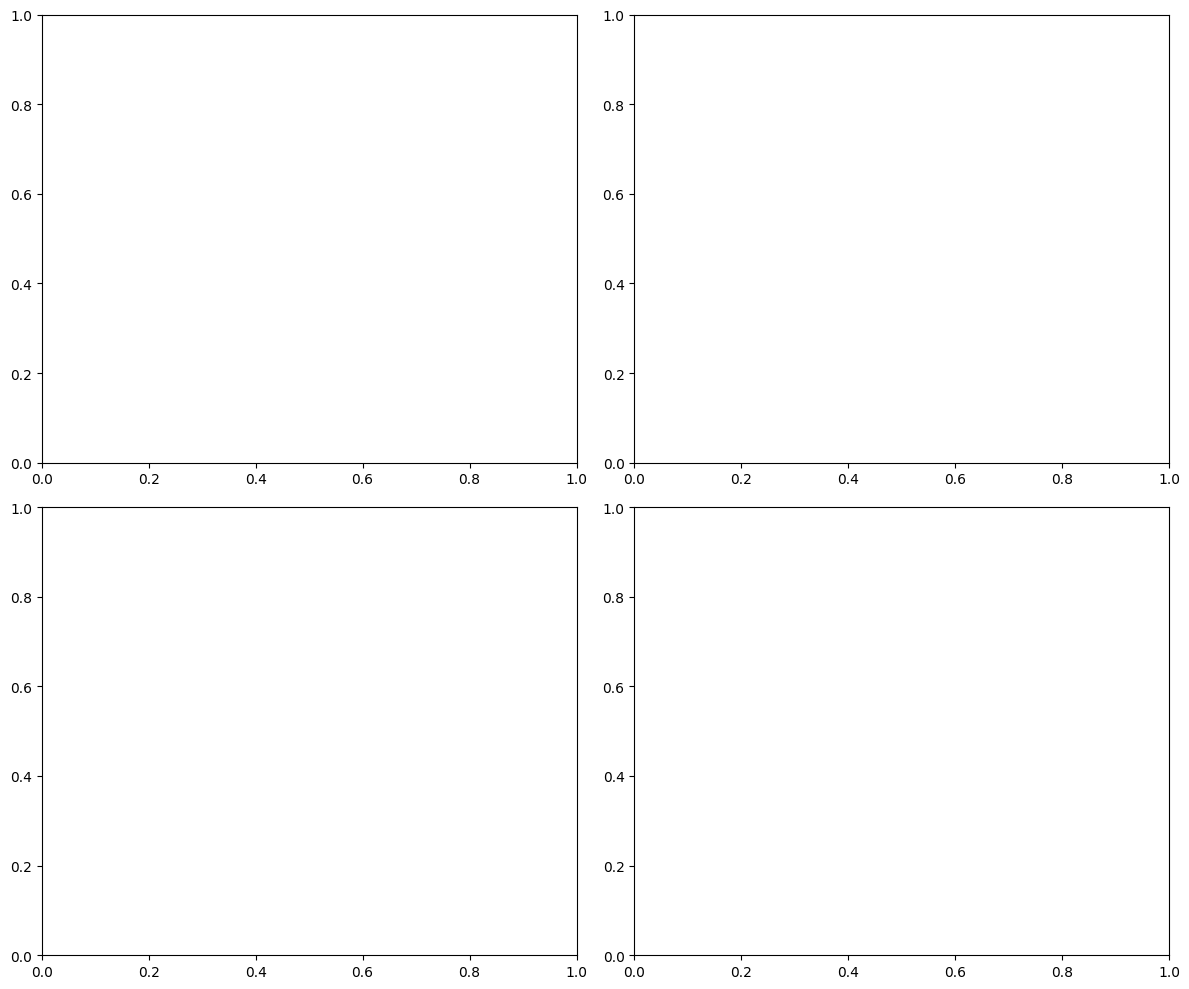

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame
south_belt 



cities = [("Fuenlabrada","Leganés","Getafe","Alcorcón")]
filtered_ds = ds[ds['level5'].isin(cities)]

populations = filtered_ds['level5'].unique()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, population in enumerate(populations):
    ax = axes[i]
    population_data = filtered_ds[filtered_ds['level5'] == population]
    
    ax.scatter(population_data['surface'], population_data['price'])
    ax.set_title(f'Scatter Plot for {population}')
    ax.set_xlabel('Surface Area')
    ax.set_ylabel('Price')

plt.tight_layout()
plt.show()



*****
import matplotlib.pyplot as plt
import pandas as pd

populations = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, population in enumerate(populations):
    population_data = south_belt_subset[south_belt_subset['level5'] == population]
    
    axes[i].scatter(population_data['surface'], population_data['price'], label=population, alpha=0.5)
    axes[i].set_title(f"Scatter Plot for {population}")
    axes[i].set_xlabel("Square Meters")
    axes[i].set_ylabel("Price")
    axes[i].legend()

plt.tight_layout()

plt.show()




#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in the question 14) (★★★★)

Execute the following cell and then start coding in the next one. You must implement a simple code that transform the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [45]:
from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map



Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [ ]:
??????